In [20]:
# Importing the required Libraries
import pandas as pd
import numpy as np
import matplotlib.pylab as plt

# Importing the Dataset from Data Acqusition Phase
dfAuto = pd.read_csv('auto85.csv')

#Fetching the first 5 rows of the Data Set
dfAuto.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


### Step 2.1 Working with Missing Data

#### Identifying and Handling Missing Values

1. Replacing ? with NaN

In [21]:
# Replacing ? with NaN
dfAuto.replace('?', np.nan, inplace = True)
dfAuto.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


2. Check for missing Data in Data Frame

In [22]:
missing_data = dfAuto.isnull()
missing_data.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


    - Counting Missing Data in Each Column

In [23]:
for col in missing_data.columns.values.tolist():
    print('Column: ', col)
    print(missing_data[col].value_counts())
    print('----------')

Column:  symboling
False    205
Name: symboling, dtype: int64
----------
Column:  normalized-losses
False    164
True      41
Name: normalized-losses, dtype: int64
----------
Column:  make
False    205
Name: make, dtype: int64
----------
Column:  fuel-type
False    205
Name: fuel-type, dtype: int64
----------
Column:  aspiration
False    205
Name: aspiration, dtype: int64
----------
Column:  num-of-doors
False    203
True       2
Name: num-of-doors, dtype: int64
----------
Column:  body-style
False    205
Name: body-style, dtype: int64
----------
Column:  drive-wheels
False    205
Name: drive-wheels, dtype: int64
----------
Column:  engine-location
False    205
Name: engine-location, dtype: int64
----------
Column:  wheel-base
False    205
Name: wheel-base, dtype: int64
----------
Column:  length
False    205
Name: length, dtype: int64
----------
Column:  width
False    205
Name: width, dtype: int64
----------
Column:  height
False    205
Name: height, dtype: int64
----------
Column:  

    Output: Missing Values in Below Columns
        - normalized-losses (41 Records)
        - num-of-doors (2 records)
        - bore (4 records)
        - stroke (4 records)
        - horsepower (2 records)
        - peak-rpm (2 records)
        - price (4 records)

In [24]:
# Identify which method to apply to which data
dfAuto[['normalized-losses', 'bore', 'stroke', 'horsepower', 'peak-rpm', 'num-of-doors', 'price']].head()

,normalized-losses,bore,stroke,horsepower,peak-rpm,num-of-doors,price
0,NaN,3.47,2.68,111,5000,two,13495
1,NaN,3.47,2.68,111,5000,two,16500
2,NaN,2.68,3.47,154,5000,two,16500
3,164,3.19,3.40,102,5500,four,13950
4,164,3.19,3.40,115,5500,four,17450


#### How to Fix it ?

   #### Replace by Mean
    - normalized-losses (41 Records)
    - bore (4 records)
    - stroke (4 records)
    - horsepower (2 records)
    - peak-rpm (2 records)
    
   #### Replace by Frequency
    - num-of-doors (2 records)
    
   #### Drop the Entire row
    - price (4 records)

In [25]:
# Fixing Price Data (Drop the Entire row)
#dfAuto['price'].isnull().value_counts()
dfAuto.dropna(subset = ['price'], axis = 0, inplace = True)
dfAuto.reset_index(drop=True, inplace=True)
dfAuto.shape

(201, 26)

In [26]:
# Replace by Frequency
    # Fixing num-of-doors variable
print(dfAuto['num-of-doors'].value_counts())

    # Printing what value occures the most
print('\nTop Freq: ', dfAuto['num-of-doors'].value_counts().idxmax())

    # Replacing the NaN values with 'four'
dfAuto['num-of-doors'].replace(np.nan,"four", inplace = True)

    # Verifying if NaN removed
dfAuto['num-of-doors'].isnull().value_counts()


four    113
two      86
Name: num-of-doors, dtype: int64

Top Freq:  four


False    201
Name: num-of-doors, dtype: int64

In [27]:
# Replace missing values by Mean
#- normalized-losses (41 Records)  --> Object type --> Convert to Float
#- bore (4 records)
#- stroke (4 records)
#- horsepower (2 records)
#- peak-rpm (2 records)

replace_by_mean  = ['normalized-losses', 'bore', 'stroke', 'horsepower', 'peak-rpm']
for i in replace_by_mean:
    mean_value = dfAuto[i].astype('float').mean()
    dfAuto[i].replace(np.nan, mean_value, inplace = True)

In [28]:
# Validating if the values are replaced
test_data = dfAuto[['normalized-losses', 'bore', 'stroke', 'horsepower', 'peak-rpm']].isnull()

for i in replace_by_mean:
    print(test_data[i].value_counts())


False    201
Name: normalized-losses, dtype: int64
False    201
Name: bore, dtype: int64
False    201
Name: stroke, dtype: int64
False    201
Name: horsepower, dtype: int64
False    201
Name: peak-rpm, dtype: int64


### Correcting the Data formats

In [29]:
# Converting the above Object types to Float
for i in replace_by_mean:
    dfAuto[[i]] = dfAuto[[i]].astype('float')

In [30]:
# Coverting the Price Valriable 
dfAuto[['price']] = dfAuto[['price']].astype('float')

In [31]:
# Verifying the Data types in Data Frame

print(dfAuto.dtypes)
dfAuto.head(3)

symboling              int64
normalized-losses    float64
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower           float64
peak-rpm             float64
city-mpg               int64
highway-mpg            int64
price                float64
dtype: object


,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,122.0,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0


In [32]:
# Saving the Data set to CSV
dfAuto.to_csv("auto85_clean.csv", index = False)

### Data Standardization

    - This step is required in case we want to convert any variable into a certain standard format.
    - Eg. mpg can be converted into L/100Km using the below formula if required
   
    L/100km = 235 / mpg
    
    (Can be skipped in our case)

### Data Normalization

     - length , width and height variable
 

In [33]:
# Displaying the variables
dfAuto[['length', 'width', 'height']].head()

,length,width,height
0,168.8,64.1,48.8
1,168.8,64.1,48.8
2,171.2,65.5,52.4
3,176.6,66.2,54.3
4,176.6,66.4,54.3


In [34]:
# Transforming the variables into range 0 to 1
# Replace original value into orig/max
dfAuto['length'] = dfAuto['length']/dfAuto['length'].max()
dfAuto['width'] = dfAuto['width']/dfAuto['width'].max()
dfAuto['height'] = dfAuto['height']/dfAuto['height'].max()

dfAuto[['length', 'width', 'height']].head()


,length,width,height
0,0.811148,0.890278,0.816054
1,0.811148,0.890278,0.816054
2,0.822681,0.909722,0.876254
3,0.848630,0.919444,0.908027
4,0.848630,0.922222,0.908027


In [35]:
dfAuto.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,122.0,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0


In [36]:
# Saving the Data set to CSV
dfAuto.to_csv("auto85_clean.csv", index = False)

### Data Binning
 - Converting Continuous Variables into Bins
 
### Identify variables that can be binned
    - horsepower (maybe low, medium, high)

In [63]:
#dfAuto.corr().tail(1)
#dfAuto.head()
#dfAuto.describe()

Text(0.5, 1.0, 'Horsepower Bins')

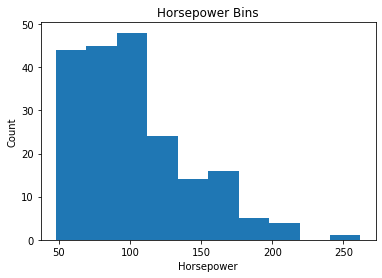

In [62]:
# Hisplaying the Histogram of Horsepower variable
import matplotlib.pyplot as plt
%matplotlib inline

# Ploting Histogram
plt.hist(dfAuto['horsepower'])
plt.xlabel("Horsepower")
plt.ylabel("Count")
plt.title("Horsepower Bins")

In [67]:
# Making 3 equal size bins and naming the bins
bins = np.linspace(min(dfAuto['horsepower']), max(dfAuto['horsepower']), 4)
group_names = ['low', 'medium', 'high']

In [70]:
# converting the values into bins
#help(pd.cut)
dfAuto['horsepower'] = pd.cut(x = dfAuto['horsepower'], bins = bins, labels = group_names, include_lowest = True)

# Validating results
dfAuto['horsepower'].value_counts()

low       153
medium     43
high        5
Name: horsepower, dtype: int64

In [79]:
# Converting to Object type now
dfAuto[['horsepower']] = dfAuto[['horsepower']].astype("object")

In [84]:
# Validating the above results
dfAuto[['horsepower']].dtypes

horsepower    object
dtype: object

Text(0.5, 1.0, 'Horsepower Bins')

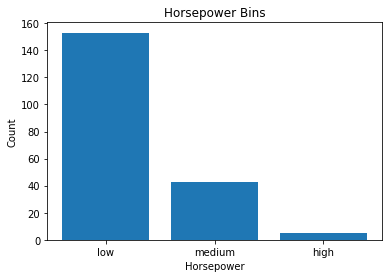

In [89]:
# Displaying the Bar Chart
import matplotlib.pyplot as plt
%matplotlib inline

# Ploting Bar chart
plt.bar(group_names, dfAuto['horsepower'].value_counts())
plt.xlabel("Horsepower")
plt.ylabel("Count")
plt.title("Horsepower Bins")

### Dummy or indicator variable
    - Following variables can be converted into Dummy Variables using pd.get_dummies function
        - fuel-type
        - aspiration
        - Others cab be added as well later

In [118]:
#dfAuto.describe(include=['object'])
#dfAuto.describe(include="all")

# Checking Unique Values
#print(dfAuto['fuel-type'].value_counts())
#print("---")

# Creating Dummy Variable for Fuel Type and adding it back to the Dataset
fuel_dummy = pd.get_dummies(dfAuto['fuel-type'])
fuel_dummy.head()

,diesel,gas
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1


In [121]:
# Renaming the dummy variables to fuel-type-diesel and fuel-type-gas
#help(fuel_dummy.rename)

fuel_dummy.rename(columns = {'diesel': 'fuel-type-diesel', 'gas': 'fuel-type-gas'}, inplace = True)
fuel_dummy.head()

,fuel-type-diesel,fuel-type-gas
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1


In [123]:
# Now adding the Dummy Variables to the Original Dataset and Dropping the original variable

#help(pd.concat)
# Merging the Dataset
dfAuto = pd.concat([dfAuto, fuel_dummy], axis = 1)

# Droping the Original Variable
dfAuto.drop("fuel-type", axis = 1, inplace = True)
dfAuto.head()

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,fuel-type-diesel,fuel-type-gas
0,3,122.0,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,3.47,2.68,9.0,low,5000.0,21,27,13495.0,0,1
1,3,122.0,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,3.47,2.68,9.0,low,5000.0,21,27,16500.0,0,1
2,1,122.0,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,2.68,3.47,9.0,medium,5000.0,19,26,16500.0,0,1
3,2,164.0,audi,std,four,sedan,fwd,front,99.8,0.848630,...,3.19,3.40,10.0,low,5500.0,24,30,13950.0,0,1
4,2,164.0,audi,std,four,sedan,4wd,front,99.4,0.848630,...,3.19,3.40,8.0,low,5500.0,18,22,17450.0,0,1


In [124]:
# Now appliying the same logic to aspiration variable

In [125]:
# Saving the Data set to CSV
dfAuto.to_csv("auto85_clean.csv", index = False)